In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
raj_df = pd.read_csv('C:/Users/Prachi/OneDrive/Desktop/ANTARCTICA_ASSIGNMENT/Raj_perf.csv')
arya_df = pd.read_csv('C:/Users/Prachi/OneDrive/Desktop/ANTARCTICA_ASSIGNMENT/arya_final_perf.csv')
ali_df = pd.read_csv('C:/Users/Prachi/OneDrive/Desktop/ANTARCTICA_ASSIGNMENT/aliperf.csv')

In [7]:
# Add a 'source_table' column to identify data source
raj_df['source_table'] = 'Raj'
arya_df['source_table'] = 'Arya'
ali_df['source_table'] = 'Ali'



In [9]:

# Combine all data into one DataFrame
all_data = pd.concat([raj_df, arya_df, ali_df], ignore_index=True)

In [15]:
# Clean and rename columns for consistency
all_data.rename(columns={
    'Day': 'day',
    'Date': 'date',
    'Leads': 'leads',
    'Time spent on LG (mins)': 'time_spent',
    'Avg Time Per Lead (mins)': 'avg_time_per_lead',
    'Daily Team Review': 'daily_team_review',
    'No. of Incomplete Leads': 'incomplete_leads'
}, inplace=True)


In [17]:
print(all_data.columns)


Index(['day', 'date', 'leads', 'time_spent', 'avg_time_per_lead',
       'daily_team_review', 'incomplete_leads', 'source_table'],
      dtype='object')


In [19]:
# Summary Statistics
summary_stats = all_data.groupby('source_table').agg(
    Total_Records=('leads', 'count'),
    Total_Leads=('leads', 'sum'),
    Avg_Leads=('leads', 'mean'),
    Avg_Time_Spent=('time_spent', 'mean'),
    Avg_Time_Per_Lead=('avg_time_per_lead', 'mean'),
    Total_Incomplete_Leads=('incomplete_leads', 'sum')
).round(2)

print(summary_stats)


              Total_Records  Total_Leads  Avg_Leads  Avg_Time_Spent  \
source_table                                                          
Ali                      42          488      11.62          219.88   
Arya                     41          474      11.56          135.83   
Raj                      42          447      10.64          252.02   

              Avg_Time_Per_Lead  Total_Incomplete_Leads  
source_table                                             
Ali                       18.98                       3  
Arya                      12.02                       9  
Raj                       23.57                      14  


In [23]:
# Convert 'date' column to datetime format
all_data['date'] = pd.to_datetime(all_data['date'])

# Sort the data by date to ensure proper sequence
all_data = all_data.sort_values(by=['source_table', 'date'])

# Encode date as numerical values for regression
all_data['date_ordinal'] = all_data['date'].map(lambda x: x.toordinal())


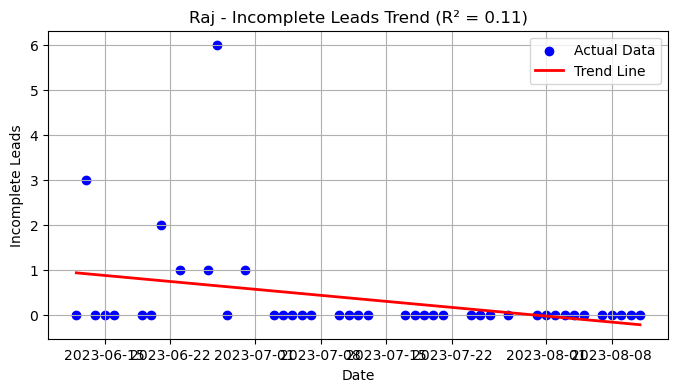

📉 Raj shows an improvement (decrease) in incomplete leads over time.


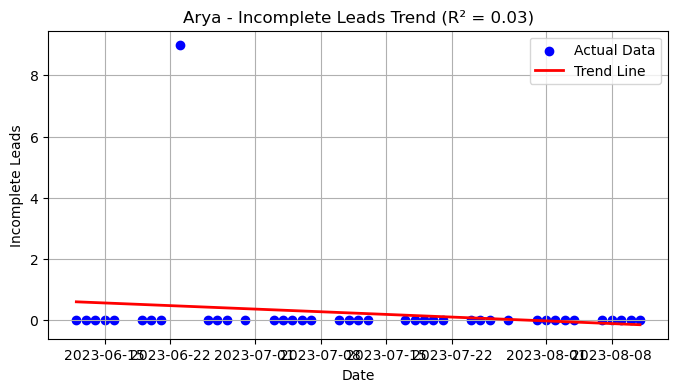

📉 Arya shows an improvement (decrease) in incomplete leads over time.


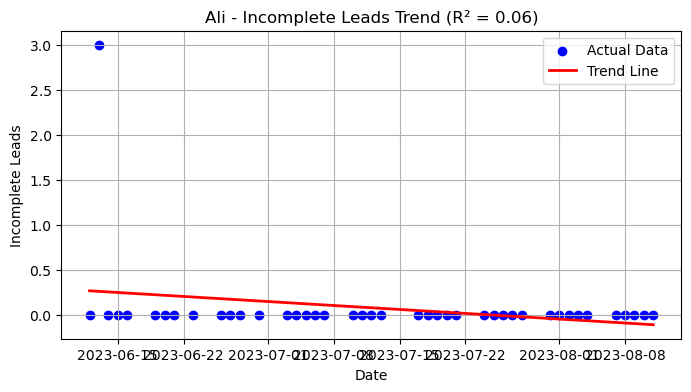

📉 Ali shows an improvement (decrease) in incomplete leads over time.


In [25]:
# Function to fit and plot linear regression for incomplete leads trend
def incomplete_leads_trend(df, associate_name):
    # Filter data for the specific associate
    data = df[df['source_table'] == associate_name]

    # Extract independent (X) and dependent (y) variables
    X = data[['date_ordinal']].values  # Date as numeric value
    y = data['incomplete_leads'].values

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predictions
    y_pred = model.predict(X)

    # Calculate R-squared for model evaluation
    r2 = r2_score(y, y_pred)

    # Visualization
    plt.figure(figsize=(8, 4))
    plt.scatter(data['date'], y, color='blue', label='Actual Data')
    plt.plot(data['date'], y_pred, color='red', linewidth=2, label='Trend Line')
    plt.title(f'{associate_name} - Incomplete Leads Trend (R² = {r2:.2f})')
    plt.xlabel('Date')
    plt.ylabel('Incomplete Leads')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Display trend details
    slope = model.coef_[0]
    if slope < 0:
        print(f"📉 {associate_name} shows an improvement (decrease) in incomplete leads over time.")
    elif slope > 0:
        print(f"📈 {associate_name} shows a deterioration (increase) in incomplete leads over time.")
    else:
        print(f"➖ {associate_name} shows no significant trend in incomplete leads over time.")

# Run the function for each associate
for associate in ['Raj', 'Arya', 'Ali']:
    incomplete_leads_trend(all_data, associate)


In [40]:
print(raj_df.columns)
print(arya_df.columns)
print(ali_df.columns)


Index(['Day', 'Date', 'Leads', 'Time spent on LG (mins)',
       'Avg Time Per Lead (mins)', 'Daily Team Review',
       'No. of Incomplete Leads', 'source_table'],
      dtype='object')
Index(['Day', 'Date', 'Leads', 'Time spent on LG (mins)',
       'Avg Time Per Lead (mins)', 'Daily Team Review',
       'No. of Incomplete Leads', 'source_table'],
      dtype='object')
Index(['Day', 'Date', 'Leads', 'Time spent on LG (mins)',
       'Avg Time Per Lead (mins)', 'Daily Team Review',
       'No. of Incomplete Leads', 'source_table'],
      dtype='object')


In [44]:


# Regression model for each associate
results = {}

for associate in all_data['source_table'].unique():
    # Filter data for each associate
    data = all_data[all_data['source_table'] == associate]

    # Features (X) and Target (y)
    X = data[['time_spent']].values.reshape(-1, 1)
    y = data['leads'].values

    # Train the model
    model = LinearRegression()
    model.fit(X, y)

    # Predictions
    y_pred = model.predict(X)

    # Model evaluation
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    # Save results
    results[associate] = {
        'MAE': round(mae, 2),
        'MSE': round(mse, 2),
        'R-squared': round(r2, 2)
    }

    # Display results
    print(f"🔹 {associate} - R-squared: {r2:.2f} | MAE: {mae:.2f} | MSE: {mse:.2f}")


🔹 Ali - R-squared: 0.41 | MAE: 2.12 | MSE: 7.17
🔹 Arya - R-squared: 0.10 | MAE: 1.49 | MSE: 4.09
🔹 Raj - R-squared: 0.57 | MAE: 1.53 | MSE: 4.06


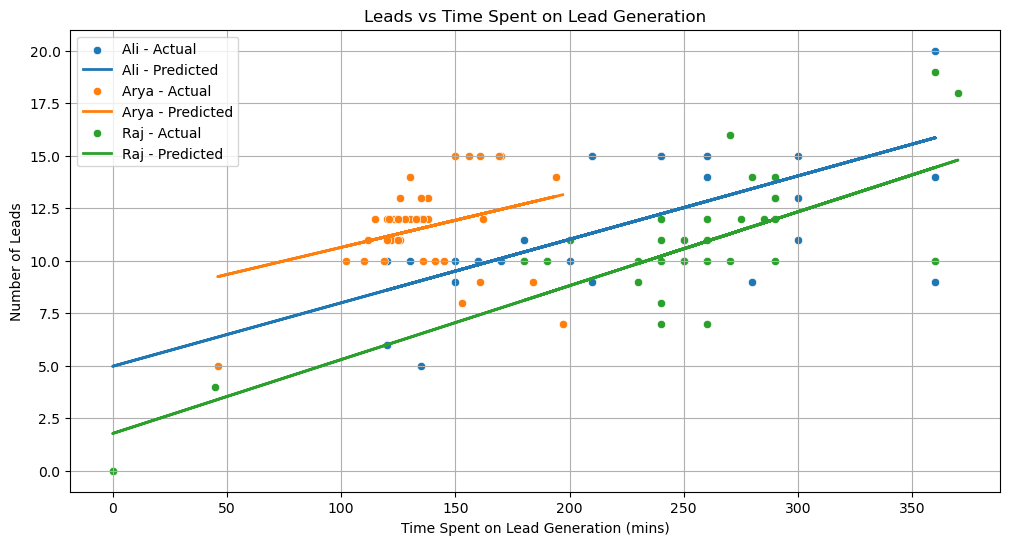

In [46]:
plt.figure(figsize=(12, 6))

for associate in all_data['source_table'].unique():
    data = all_data[all_data['source_table'] == associate]
    X = data[['time_spent']].values.reshape(-1, 1)
    y = data['leads'].values
    y_pred = LinearRegression().fit(X, y).predict(X)

    sns.scatterplot(x='time_spent', y='leads', data=data, label=f'{associate} - Actual')
    plt.plot(X, y_pred, label=f'{associate} - Predicted', linewidth=2)

plt.title('Leads vs Time Spent on Lead Generation')
plt.xlabel('Time Spent on Lead Generation (mins)')
plt.ylabel('Number of Leads')
plt.legend()
plt.grid(True)
plt.show()
